In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from citipy import citipy
import requests
from config import weather_api_key
import time
from datetime import datetime

In [36]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [37]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [38]:
def latitudes(size):
    latitudes = []
    x = 0
    for x in range(size):
        random_lat = random.randint(-90, 90) + random.random()
        latitudes.append(random_lat)
        x += 1
    return latitudes
# Call the function with 1500.
%timeit latitudes(1500)

1.3 ms ± 24.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [19]:
# Create a list for holding city values
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # if the city is unique, then add it to the 'cities' list
    if city not in cities:
        cities.append(city)
        
# Print the length of cities list to ensure sufficient count.
len(cities)

604

In [6]:
# make an API call fro mOpenWeather site

print(url)

https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c792bb4de9a6661ce36b24f52ccc0f7


In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city. 
    # Replace spaces with "+" to avoid breaking the link for cities with multiples words in the name
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | novoagansk
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 4 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 5 of Set 1 | langsa
Processing Record 6 of Set 1 | chapais
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | poum
Processing Record 9 of Set 1 | bukachacha
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | anshun
Processing Record 13 of Set 1 | saldanha
Processing Record 14 of Set 1 | samusu
City not found. Skipping...
Processing Record 15 of Set 1 | denpasar
Processing Record 16 of Set 1 | opuwo
Processing Record 17 of Set 1 | oktyabrskiy
Processing Record 18 of Set 1 | praia
Processing Record 19 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 20 of Set 1 | kodiak
Processing Record 21 of Set 1 

Processing Record 35 of Set 4 | longyearbyen
Processing Record 36 of Set 4 | nizhniy tsasuchey
Processing Record 37 of Set 4 | zimovniki
Processing Record 38 of Set 4 | shirokiy
Processing Record 39 of Set 4 | fuling
Processing Record 40 of Set 4 | palmer
Processing Record 41 of Set 4 | san quintin
Processing Record 42 of Set 4 | oyama
Processing Record 43 of Set 4 | upernavik
Processing Record 44 of Set 4 | karasjok
Processing Record 45 of Set 4 | mongo
Processing Record 46 of Set 4 | palora
Processing Record 47 of Set 4 | clyde river
Processing Record 48 of Set 4 | corning
Processing Record 49 of Set 4 | mehamn
Processing Record 50 of Set 4 | price
Processing Record 1 of Set 5 | grand-lahou
Processing Record 2 of Set 5 | bekhtery
Processing Record 3 of Set 5 | chilca
Processing Record 4 of Set 5 | harper
Processing Record 5 of Set 5 | aksarka
Processing Record 6 of Set 5 | lebu
Processing Record 7 of Set 5 | saskylakh
Processing Record 8 of Set 5 | pacifica
Processing Record 9 of Set

Processing Record 28 of Set 8 | san cristobal
Processing Record 29 of Set 8 | fare
Processing Record 30 of Set 8 | rocha
Processing Record 31 of Set 8 | lamar
Processing Record 32 of Set 8 | phan rang
City not found. Skipping...
Processing Record 33 of Set 8 | gemena
Processing Record 34 of Set 8 | meulaboh
Processing Record 35 of Set 8 | olinda
Processing Record 36 of Set 8 | wajima
Processing Record 37 of Set 8 | antalaha
Processing Record 38 of Set 8 | pemangkat
Processing Record 39 of Set 8 | smithers
Processing Record 40 of Set 8 | gigmoto
Processing Record 41 of Set 8 | puerto palomas
Processing Record 42 of Set 8 | bud
Processing Record 43 of Set 8 | katsuura
Processing Record 44 of Set 8 | rabaul
Processing Record 45 of Set 8 | beruwala
Processing Record 46 of Set 8 | hofn
Processing Record 47 of Set 8 | sakakah
Processing Record 48 of Set 8 | faya
Processing Record 49 of Set 8 | port-gentil
Processing Record 50 of Set 8 | marquette
Processing Record 1 of Set 9 | ugoofaaru
Proc

Processing Record 17 of Set 12 | kakching
Processing Record 18 of Set 12 | korop
Processing Record 19 of Set 12 | ahipara
Processing Record 20 of Set 12 | caririacu
Processing Record 21 of Set 12 | yeletskiy
City not found. Skipping...
Processing Record 22 of Set 12 | tommot
Processing Record 23 of Set 12 | namatanai
Processing Record 24 of Set 12 | aflu
City not found. Skipping...
Processing Record 25 of Set 12 | george
Processing Record 26 of Set 12 | phalaborwa
Processing Record 27 of Set 12 | samarai
Processing Record 28 of Set 12 | port hedland
Processing Record 29 of Set 12 | naze
Processing Record 30 of Set 12 | saint andrews
Processing Record 31 of Set 12 | grand gaube
Processing Record 32 of Set 12 | aitape
Processing Record 33 of Set 12 | iberia
Processing Record 34 of Set 12 | darhan
Processing Record 35 of Set 12 | vaitape
Processing Record 36 of Set 12 | hargeysa
Processing Record 37 of Set 12 | birao
Processing Record 38 of Set 12 | roald
Processing Record 39 of Set 12 | 

In [39]:
len(city_data)

573

In [40]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Novoagansk,61.9449,76.6625,69.13,57,3,11.88,RU,2022-07-27 05:08:55
1,Atuona,-9.8000,-139.0333,77.56,74,12,17.67,PF,2022-07-27 05:06:52
2,Langsa,4.4683,97.9683,90.36,56,100,2.21,ID,2022-07-27 05:08:56
3,Chapais,49.7834,-74.8492,46.81,96,32,3.94,CA,2022-07-27 05:08:57
4,Busselton,-33.6500,115.3333,60.85,64,97,4.03,AU,2022-07-27 05:05:43
5,Poum,-20.2333,164.0167,74.64,72,0,5.66,NC,2022-07-27 05:04:18
6,Bukachacha,52.9833,116.9167,73.74,57,35,16.84,RU,2022-07-27 05:08:58
7,Hobart,-42.8794,147.3294,57.06,68,40,10.36,AU,2022-07-27 05:00:23
8,Ushuaia,-54.8000,-68.3000,27.27,90,87,6.15,AR,2022-07-27 05:00:20
9,Anshun,26.2500,105.9333,79.66,71,36,13.27,CN,2022-07-27 05:08:59


In [41]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Novoagansk,RU,2022-07-27 05:08:55,61.9449,76.6625,69.13,57,3,11.88
1,Atuona,PF,2022-07-27 05:06:52,-9.8000,-139.0333,77.56,74,12,17.67
2,Langsa,ID,2022-07-27 05:08:56,4.4683,97.9683,90.36,56,100,2.21
3,Chapais,CA,2022-07-27 05:08:57,49.7834,-74.8492,46.81,96,32,3.94
4,Busselton,AU,2022-07-27 05:05:43,-33.6500,115.3333,60.85,64,97,4.03
5,Poum,NC,2022-07-27 05:04:18,-20.2333,164.0167,74.64,72,0,5.66
6,Bukachacha,RU,2022-07-27 05:08:58,52.9833,116.9167,73.74,57,35,16.84
7,Hobart,AU,2022-07-27 05:00:23,-42.8794,147.3294,57.06,68,40,10.36
8,Ushuaia,AR,2022-07-27 05:00:20,-54.8000,-68.3000,27.27,90,87,6.15
9,Anshun,CN,2022-07-27 05:08:59,26.2500,105.9333,79.66,71,36,13.27


In [42]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [43]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

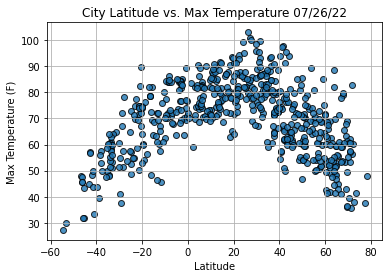

In [44]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

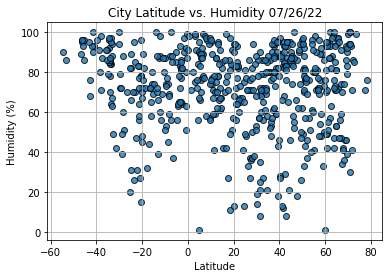

In [45]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

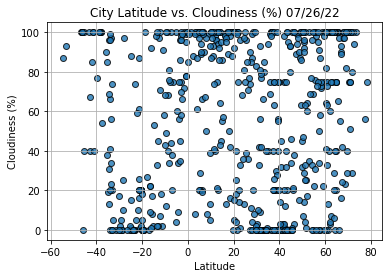

In [46]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

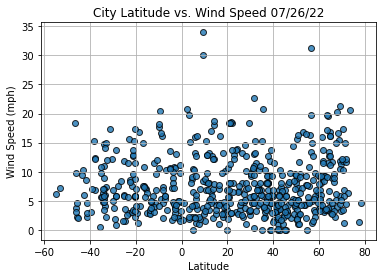

In [47]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [49]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [51]:
index13 = city_data_df.loc[13]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Novoagansk,RU,2022-07-27 05:08:55,61.9449,76.6625,69.13,57,3,11.88
1,Atuona,PF,2022-07-27 05:06:52,-9.8000,-139.0333,77.56,74,12,17.67
2,Langsa,ID,2022-07-27 05:08:56,4.4683,97.9683,90.36,56,100,2.21
3,Chapais,CA,2022-07-27 05:08:57,49.7834,-74.8492,46.81,96,32,3.94
4,Busselton,AU,2022-07-27 05:05:43,-33.6500,115.3333,60.85,64,97,4.03
...,...,...,...,...,...,...,...,...,...
568,Derzhavinsk,KZ,2022-07-27 05:26:02,51.1000,66.3167,78.03,43,25,16.33
569,Katobu,ID,2022-07-27 05:26:02,-4.9408,122.5276,85.26,56,60,10.40
570,Kurilsk,RU,2022-07-27 05:26:03,45.2333,147.8833,64.72,87,46,3.13
571,Huilong,CN,2022-07-27 05:26:04,31.8111,121.6550,86.76,71,42,5.77


In [52]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4      False
       ...  
568     True
569    False
570     True
571     True
572     True
Name: Lat, Length: 573, dtype: bool

In [53]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Novoagansk,RU,2022-07-27 05:08:55,61.9449,76.6625,69.13,57,3,11.88
2,Langsa,ID,2022-07-27 05:08:56,4.4683,97.9683,90.36,56,100,2.21
3,Chapais,CA,2022-07-27 05:08:57,49.7834,-74.8492,46.81,96,32,3.94
6,Bukachacha,RU,2022-07-27 05:08:58,52.9833,116.9167,73.74,57,35,16.84
9,Anshun,CN,2022-07-27 05:08:59,26.2500,105.9333,79.66,71,36,13.27
...,...,...,...,...,...,...,...,...,...
567,Mao,ES,2022-07-27 05:22:17,39.8885,4.2658,73.96,78,20,6.91
568,Derzhavinsk,KZ,2022-07-27 05:26:02,51.1000,66.3167,78.03,43,25,16.33
570,Kurilsk,RU,2022-07-27 05:26:03,45.2333,147.8833,64.72,87,46,3.13
571,Huilong,CN,2022-07-27 05:26:04,31.8111,121.6550,86.76,71,42,5.77


In [54]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Novoagansk,RU,2022-07-27 05:08:55,61.9449,76.6625,69.13,57,3,11.88
2,Langsa,ID,2022-07-27 05:08:56,4.4683,97.9683,90.36,56,100,2.21
3,Chapais,CA,2022-07-27 05:08:57,49.7834,-74.8492,46.81,96,32,3.94
6,Bukachacha,RU,2022-07-27 05:08:58,52.9833,116.9167,73.74,57,35,16.84
9,Anshun,CN,2022-07-27 05:08:59,26.2500,105.9333,79.66,71,36,13.27


In [56]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

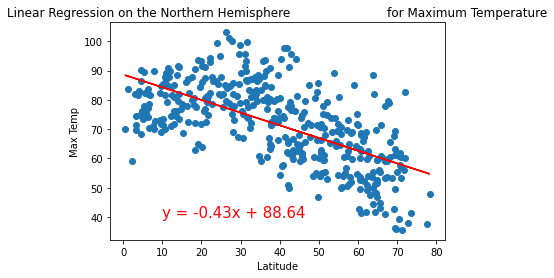

In [57]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

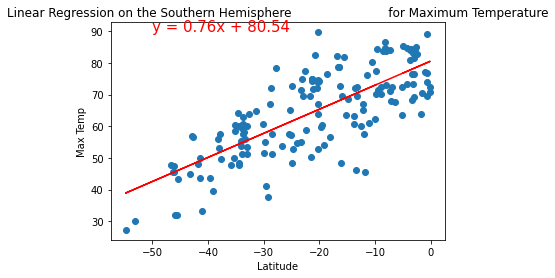

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

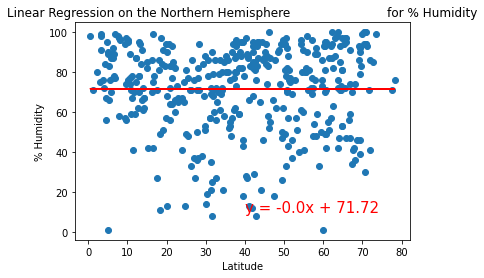

In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

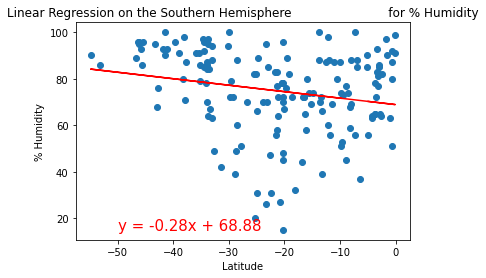

In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

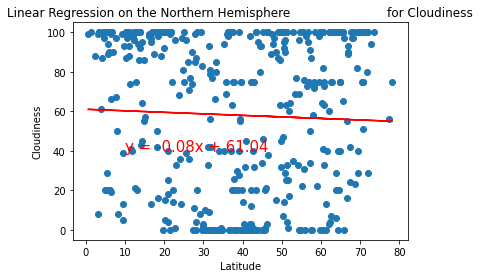

In [69]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Cloudiness', 'Cloudiness',(10,40))

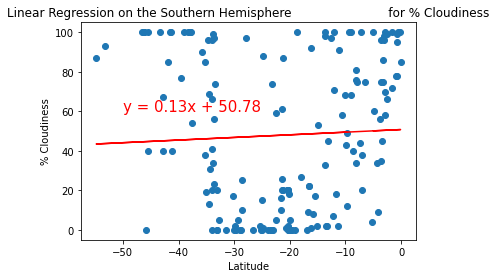

In [70]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

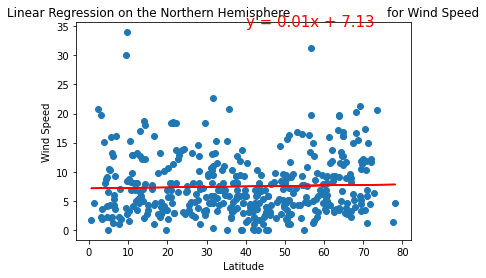

In [71]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

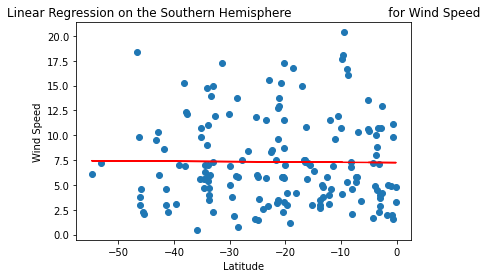

In [72]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [73]:
$ jupyter nbextension enable --py --sys-prefix widgetsnbextension

SyntaxError: invalid syntax (2066975275.py, line 1)

In [76]:
!pip install gmaps